In [1]:
# DATA-23500, Spring Semester, 2023
# NAME: Stephen Feddes
# PROGRAMMING ASSIGNMENT #4

%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

yelp_df = pd.read_csv("Yelp_Data.csv")

yelp_df = yelp_df.dropna() # Drops all rows with an NaN value

In [2]:
# Question 3

print(f"The dataset has a size of {yelp_df.size} cells") # Size of the dataset
print(str(yelp_df.shape[0]) + " rows") # Number of rows (The rows containing an NaN are removed)
print(str(yelp_df.shape[1]) + " columns") # Number of columns

The dataset has a size of 2909560 cells
72739 rows
40 columns


In [3]:
# Question 4

yelp_df.columns # Lists all the column names

Index(['business_id', 'city', 'full_address', 'latitude', 'longitude', 'name',
       'review_count', 'stars', 'state', 'type', 'Fast_Food', 'Nightlife',
       'Pizza', 'Bars', 'Mexican', 'Food', 'American (Traditional)', 'Burgers',
       'Chinese', 'Italian', 'American (New)', 'Breakfast & Brunch', 'Thai',
       'Indian', 'Sushi Bars', 'Korean', 'Mediterranean', 'Japanese',
       'Seafood', 'Middle Eastern', 'Pakistani', 'Barbeque', 'Vietnamese',
       'Asian Fusion', 'Diners', 'Greek', 'Vegetarian', 'Number_of_Checkins',
       'Number_of_Tips', 'Number_of_Tip_Likes'],
      dtype='object')

In [4]:
# Question 5

yelp_df.head(5) # Shows the top 5 rows

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,"1530 Hamilton Rd Bethel Park, PA 15234",40.354115,-80.014660,Cool Springs Golf Center,5,2.5,PA,business,...,0,0,0,0,0,0,0,9,1,0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,"301 South Hills Village Pittsburgh, PA 15241",40.357620,-80.059980,Verizon,5,2.5,PA,business,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Question 6

state_avg_star = {}

for state_name in yelp_df.state.unique():
    
    state_avg_star[state_name] = round(yelp_df.loc[yelp_df.state==state_name].stars.mean(), 2)
    
state_avg_star # Displays each state's average star rating (ignoring the number of reviews)

{'PA': 3.7,
 'NC': 3.59,
 'SC': 3.57,
 'WI': 3.66,
 'IL': 3.55,
 'AZ': 3.71,
 'NV': 3.68,
 'NM': 3.0,
 'AR': 5.0,
 'QC': 3.58,
 'ON': 3.58,
 'TX': 4.5,
 'EDH': 3.81,
 'MLN': 3.84,
 'ELN': 3.79,
 'HAM': 4.5,
 'SCB': 4.0,
 'FIF': 3.7,
 'NTH': 2.0,
 'BW': 3.77,
 'RP': 4.08,
 'CA': 3.5,
 'KHL': 3.5,
 'MN': 5.0,
 'MA': 5.0,
 'NW': 4.5,
 'OR': 2.5,
 'AL': 3.5}

In [6]:
# Question 7

state_avg_star = {}

for state_name in yelp_df.state.unique():
    
    weighted_stars = 0
    total_reviews=0
    
    for i, row in yelp_df.loc[yelp_df.state==state_name].iterrows():
        total_reviews+=row["review_count"]
        
        # Adds the restaurant's stars, weighted by its review_count, to the state total
        weighted_stars+=row["stars"]*row["review_count"] 
    
    # Maps the state to its average stars, with each rating weighed by the restaurant's number of reviews
    state_avg_star[state_name] = round(weighted_stars/total_reviews, 2)
    
state_avg_star # Displays each state's average star rating, where each rating in each state is weighted by its number of reviews

{'PA': 3.76,
 'NC': 3.69,
 'SC': 3.65,
 'WI': 3.75,
 'IL': 3.69,
 'AZ': 3.77,
 'NV': 3.73,
 'NM': 3.0,
 'AR': 5.0,
 'QC': 3.6,
 'ON': 3.63,
 'TX': 4.01,
 'EDH': 3.87,
 'MLN': 3.96,
 'ELN': 3.76,
 'HAM': 4.5,
 'SCB': 4.0,
 'FIF': 3.58,
 'NTH': 2.0,
 'BW': 3.74,
 'RP': 3.89,
 'CA': 3.39,
 'KHL': 3.5,
 'MN': 5.0,
 'MA': 5.0,
 'NW': 4.5,
 'OR': 2.5,
 'AL': 3.5}

In [7]:
# Question 8

# Gets the mode of a column containing the last 5 characters (the zip code) from each address in Arizona. 
az_zip_mode = yelp_df.loc[yelp_df.state=="AZ"].full_address.apply(lambda ad: ad[len(ad)-5:]).mode()[0]

nv_zip_mode = yelp_df.loc[yelp_df.state=="NV"].full_address.apply(lambda ad: ad[len(ad)-5:]).mode()[0]

print(f"The most popular zip code for restaurants rated in AZ and NV are {az_zip_mode} and {nv_zip_mode} respectively")

The most popular zip code for restaurants rated in AZ and NV are 85251 and 89109 respectively


In [8]:
# Question 9

state_df_list = []

# Returns a dataframe with a column containing the proportion of reviews a restaurant has relative to the total number of
# reviews in that restaurant's state (AZ, IL, NC, NV).
for state in ["IL","AZ","NC","NV"]:
    
    state_df = yelp_df.loc[yelp_df.state==state]
    state_df["Fraction_Reviews"] = state_df.review_count.apply(lambda rev: rev/state_df.review_count.sum())
    
    state_df_list.append(state_df)

yelp_frac_revs_df = pd.concat(state_df_list, ignore_index=True) # Combines all the state-filtered dataframes into one
    
yelp_frac_revs_df[["business_id", "city", "full_address", "review_count", "stars", "state", "Fraction_Reviews"]]

C:\Users\sfedd\AppData\Local\Temp/ipykernel_15584/1011587206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df["Fraction_Reviews"] = state_df.review_count.apply(lambda rev: rev/state_df.review_count.sum())


,business_id,city,full_address,review_count,stars,state,Fraction_Reviews
0,27q7XsLrKPNwr8i5RcCOvQ,Urbana,"1309 E Washington St Urbana, IL 61802",10,4.0,IL,0.000579
1,G_NB9evo2fn3_Lgfpap6iw,Urbana,"104 S Vine St Urbana, IL 61802",6,4.0,IL,0.000347
2,UcuoAlVyNXeD1Na9M47qZw,Urbana,"2108 E University Ave Urbana, IL 61802",3,3.5,IL,0.000174
3,4jlqFH3cZsgRdWxZ6kwwvg,Urbana,"802 Perkins Rd Urbana, IL 61802",5,3.5,IL,0.000289
4,P_X0pRArVxBjCihppLmHJg,Urbana,"2001 N Kenyon Rd Urbana, IL 61802",4,5.0,IL,0.000232
...,...,...,...,...,...,...,...
60538,ArtsD3RqfCVjIRSZunIh_g,Las Vegas,"7040 S Rainbow Blvd Spring Valley Las Vegas, N...",21,3.0,NV,0.000020
60539,g4_7pOA-6uO19l2S2Tl2Pw,Las Vegas,"3131 S Lasvegas Blvd The Strip Las Vegas, NV 8...",13,3.5,NV,0.000012
60540,ZC6Mc9o-qtHeVo8ICl-U6Q,North Las Vegas,"West Rome Blvd North Las Vegas, NV 89084",3,5.0,NV,0.000003
60541,9-pGDHbyIoP_KhguG6vI1Q,Henderson,"239 N Pecos Rd Henderson, NV 89074",9,5.0,NV,0.000009


In [9]:
# Question 10

state_df_list = []

# Calculates the number of businesses in each state. If there's at least 100, then the state-specific dateframe is added to a 
# list. After all the states have been checked, all the dataframes are combined into one dataframe that only has states with at 
# least 100 different restaurant reviews.
for state_name in yelp_df.state.unique():
    
    if len(yelp_df.loc[yelp_df.state==state_name].business_id.unique()) >= 100:
        
        state_df_list.append(yelp_df.loc[yelp_df.state==state_name])
        

df_well_reviewed = pd.concat(state_df_list, ignore_index=True)

print(df_well_reviewed.state.unique())
df_well_reviewed

['PA' 'NC' 'SC' 'WI' 'IL' 'AZ' 'NV' 'QC' 'ON' 'EDH' 'MLN' 'BW']


,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,"1530 Hamilton Rd Bethel Park, PA 15234",40.354115,-80.014660,Cool Springs Golf Center,5,2.5,PA,business,...,0,0,0,0,0,0,0,9,1,0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,"301 South Hills Village Pittsburgh, PA 15241",40.357620,-80.059980,Verizon,5,2.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72693,wSGnhcKdwG0HdyxNhJPm4Q,Karlsruhe,Hirschhof 3-5 76133 Karlsruhe,49.010504,8.393088,Cafe Dom,6,4.0,BW,business,...,0,0,0,0,0,0,0,0,0,0
72694,YiGyXgA9lAFFZcu_JkP0qw,Ettlingen,Zehntwiesenstr. 47 76275 Ettlingen,48.945428,8.389415,"real,-",3,3.5,BW,business,...,0,0,0,0,0,0,0,0,0,0
72695,CFoN6P3YWTBEfCIRrTsYbA,Karlsruhe,Waldstr. 30 76133 Karlsruhe,49.010228,8.397797,Charles Oxford,5,3.0,BW,business,...,0,0,0,0,0,0,0,5,0,0
72696,1jDHVggroVhQAKLdktUhug,Karlsruhe,Post Galerie Kaiserstr. 217 76133 Karlsruhe,49.009389,8.394352,Fai Sushi,6,2.5,BW,business,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Question 11

state_diners_total = {"state": [],
                     "total_diners": []}

# Fills the dictionary with the each state and the number of diners in that state (for states with at least 1000 different 
# reviews across all restaurants)
for state_name in yelp_df.state.unique():
    
    if yelp_df.loc[yelp_df.state==state_name].review_count.sum() >= 1000:
        
        state_diners_total["state"].append(state_name)
        state_diners_total["total_diners"].append(yelp_df.loc[yelp_df.state==state_name].Diners.sum())
        
df_diners = pd.DataFrame.from_dict(state_diners_total)
        
df_diners

,state,total_diners
0,PA,51
1,NC,31
2,SC,2
3,WI,16
4,IL,8
5,AZ,95
6,NV,48
7,QC,4
8,ON,8
9,TX,0


In [11]:
# Question 12

# Function returns the number of cities in a state that start with 'P'
def cities_startwith_p(state_name):
    
    return len(yelp_df.loc[(yelp_df.state==state_name) & (yelp_df.city.str[0]=='P')].city.unique())

state_tips = {} # Dictionary mapping each appropriate state to the total number of tips in that state

for state in yelp_df.state.unique():
    
    if cities_startwith_p(state) >= 2:
        
        state_tips[state] = yelp_df.loc[(yelp_df.state==state)].Number_of_Tips.sum()
        
state_tips

{'PA': 16602, 'NC': 31845, 'AZ': 223405, 'QC': 1240}

Question 1: Is the distribution of stars skewed left?

Question 2: Do PA, NC, IL, SC, WI, IL, AZ, and NV have the same average number of reviews and the same average number of tips?

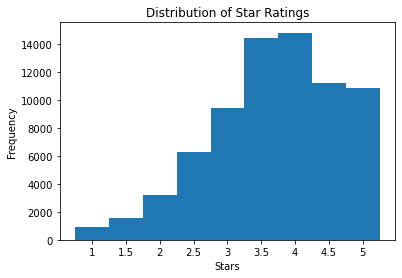

In [12]:
# Question 13

fig, ax = plt.subplots()

yelp_df.stars.plot(kind="hist", bins=[.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25], 
                   title="Distribution of Star Ratings", ax=ax)

ax.set_xlabel("Stars")
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], 
           (1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5))

plt.show()

# This distribution is roughly what I expected. Restauraunts rated very low presumably tend to go out of business. Highly rated
# restaurant tend to stay in business, presumably. People tend to go to restaurants that they like. Further, 
# it seems that people are nice and do not want to hurt a business by leaving a poor review.

In [13]:
# Question 13

state_avg_stars_tips = {"state": [],
                     "avg_review_count": [],
                     "avg_tips": []}

# Calculates the average review count and average number of tips for the states of interest and adds it to the dictionary.
# The dictionary is then converted to a Pandas dataframe.
for state_name in ["PA", "NC", "IL", "SC", "WI", "AZ", "NV"]:
     
    state_avg_stars_tips["state"].append(state_name)
    state_avg_stars_tips["avg_review_count"].append((yelp_df.loc[(yelp_df.state)==state_name].review_count.mean()))
    state_avg_stars_tips["avg_tips"].append(yelp_df.loc[(yelp_df.state==state_name)].Number_of_Tips.mean())
        
Q2_df= pd.DataFrame.from_dict(state_avg_stars_tips)

Q2_df # This dataframe is plotted in the cell below

,state,avg_review_count,avg_tips
0,PA,26.593139,4.449745
1,NC,23.475803,5.189017
2,IL,23.532698,2.311989
3,SC,14.734317,2.933579
4,WI,23.033262,3.490701
5,AZ,27.845296,6.867027
6,NV,49.552060,13.418090


(0.0, 14.0)

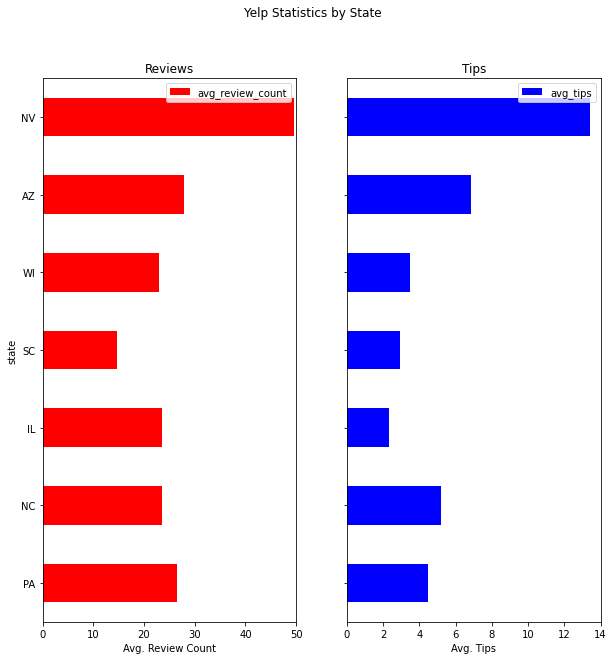

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,10))
fig.suptitle("Yelp Statistics by State")

# Bar plot of state vs average review count in that state
Q2_df.plot(kind="barh", x="state", y="avg_review_count", ax=ax[0], title="Reviews", color='r')
ax[0].set_xlabel("Avg. Review Count")
ax[0].legend(loc='upper right')
ax[0].set_xlim([0, 50])

# Bar plot of state vs average tip count in that state
Q2_df.plot(kind="barh", x="state", y="avg_tips", ax=ax[1], color='b', title="Tips")
ax[1].set_xlabel("Avg. Tips")
ax[1].legend(loc='upper right')
ax[1].set_xlim([0,14])


# It clearly seems that the averages are not all equal. However, there seems to a positive relationship between reviews and tips
# It seems that the more reviews a state has, the more tips it has. The exception seems to be Illinois. Illinois has the 
# smallest average number of tips even though it has the 4th highest average number of reviews. It seems Illinois's people are
# more rude than other state's people.